# Simulation of Airborne Virus Spread with Wall
* When there is a wall in the room, we can simulate the effect of the wall by introducing a Dirichlet boundary condition (i.e. a fixed concentration value) at the location of the wall.
* Since the virus cannot cross the wall, the virus concentration on both sides of the wall is independent. We can think of the wall as a combination of two Neumann boundary conditions.
* In this code, I introduce a Dirichlet boundary condition at the position S of the wall, fixing the concentration at that position to 0. This mimics the effect of a wall, making it impossible for the virus to cross.

## Model Description

We aim to model the diffusion of a virus in a room of length $ L$ with a wall located at position $ S $ (where $0 < S < L $). The wall acts as a barrier, preventing the virus from passing through.

### Governing Equations

1. **Left of the Wall (0 ≤ x < S)**:
$$\frac{\partial u_1}{\partial t} = D \frac{\partial^2 u_1}{\partial x^2}$$

2. **Right of the Wall (S < x ≤ L)**:
$$\frac{\partial u_2}{\partial t} = D \frac{\partial^2 u_2}{\partial x^2} $$

Where:
- $ u_1(x,t) $ represents the virus concentration at position $ x $and time $ t $ on the left side of the wall.
-$ u_2(x,t) $ represents the virus concentration at position $x $ and time $t $ on the right side of the wall.

### Boundary and Interface Conditions

1. **Boundary Conditions**:
   - Neumann condition at $x = 0 $ (left end of the room): $$\frac{\partial u_1}{\partial x} = 0$$
   - Neumann condition at $ x = L $ (right end of the room): $$ \frac{\partial u_2}{\partial x} = 0 $$

2. **Interface Conditions at the Wall (x = S)**:
   - Continuity of concentration: $$ u_1(S^-, t) = u_2(S^+, t) = 0 $$ (since the wall prevents virus transmission)
   - Continuity of flux: $$ D \frac{\partial u_1}{\partial x} \Big|_{x=S^-} = D \frac{\partial u_2}{\partial x} \Big|_{x=S^+} $$(indicating that the virus flux is the same on both sides of the wall)

3. **Initial Condition**:
   - $u_1(x,0) = $ 1 for $ x = 0 $and 0 elsewhere.
   - $ u_2(x,0) = 0 $ for all $ x $.

These equations describe the diffusion of the virus on both sides of the wall. Due to the presence of the wall, solutions for the two regions need to be matched at the wall's position, ensuring continuity in concentration and flux.


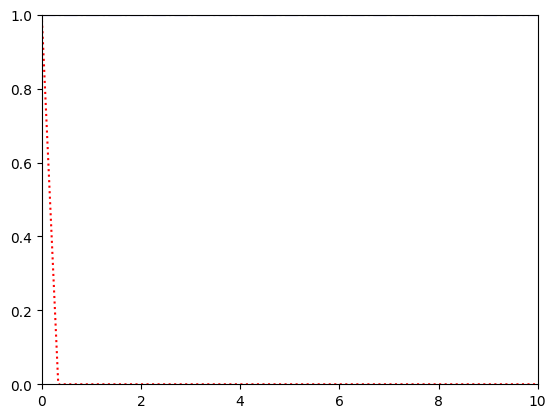

In [13]:
'''
This script finds a numerical approximation for the solution to
 the following 1D diffusion equation with Neumann conditions and a wall:
   u_t = D * u_xx  for  x \in (0,L),  t \in (0,T),
   u(x,t=0) = x,
   u'(x=0,t) = 0, u'(x=L,t) = 0,
   u(x=S,t) = 0 for all t (representing the wall),
 using a backward Euler scheme.
'''
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation

# Parameters
L = 10.0
T = 10
D = 1
S = 7.0  # Position of the wall
Nx_spaces = 30
Nt_gaps = 50
Nx_points = Nx_spaces + 1
Nt_points = Nt_gaps + 1

x = np.linspace(0, L, Nx_points)
dx = x[1] - x[0]
t = np.linspace(0, T, Nt_points)
dt = t[1] - t[0]
C = D * dt / dx**2

# Data structures for the linear system
A = np.zeros((Nx_points, Nx_points))
b = np.zeros(Nx_points)

# Set up the matrix A
for i in range(1, Nx_points-1):
    A[i, i-1] = -C
    A[i, i+1] = -C
    A[i, i] = 1 + 2*C
A[0, 0] = 1 + 2*C
A[0, 1] = -2*C
A[Nx_points-1, Nx_points-1] = 1 + 2*C
A[Nx_points-1, Nx_points-2] = -2*C

# Adjusting for the wall
wall_idx = int(S / dx)
A[wall_idx, :] = 0
A[wall_idx, wall_idx] = 1

Ainv = np.linalg.inv(A)

# Initial condition function
def I(x):
    return np.where(x == 0, 1, 0)

u_old = I(x)

U = np.zeros((Nx_points, Nt_points))
U[:, 0] = u_old
U_ex = np.zeros((Nx_points, Nt_points))
U_ex[:, 0] = U_exact(x, 0)

# Time-stepping using backward Euler
for n in range(1, Nt_points):
    b[:] = u_old[:]
    u = np.dot(Ainv, b)
    u_old = u
    U[:, n] = u
    U_ex[:, n] = U_exact(x, t[n])

# Animation
fig, ax = plt.subplots()
ax.axis([0, L, 0, 1])

def animate(i):
    l.set_data(x, U[:, i])
    m.set_data(x, U_ex[:, i])

l, = ax.plot([], [], ':r')
m, = ax.plot([], [], '-.b')

ani = matplotlib.animation.FuncAnimation(fig, animate, frames=Nt_points)

from IPython.display import HTML
HTML(ani.to_jshtml())
